In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../../data/train/full_train_data.csv'
df = pd.read_csv(path).set_index('#')
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_ratio
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,0.278195
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,0.380165
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.674242
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.560000
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,0.491071


### Premières analyses de la base de données

#### Répartition des pokémons légendaires selon les types 1 et 2

Text(0.5, 1.0, 'Occurence avec Légendaire pour le Type 1')

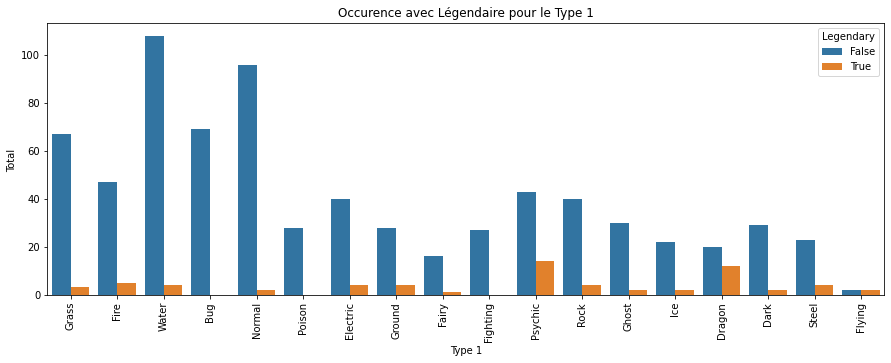

In [3]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="Type 1", hue="Legendary", data=df)

plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Occurence avec Légendaire pour le Type 1")

Text(0.5, 1.0, 'Occurence avec Légendaire pour le Type 2')

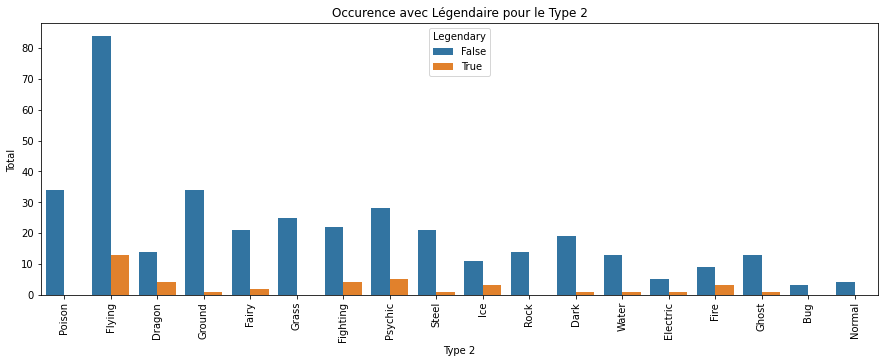

In [4]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x="Type 2", hue="Legendary", data=df)

plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Occurence avec Légendaire pour le Type 2")

#### Comparer deux pokemons avec  plotly

In [5]:
import plotly.graph_objects as go

In [6]:
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_ratio']

pokemon_1_index = 164
pokemon_2_index = 432

# On normalise les données pour la lisibilité 
norm_df = df[columns].copy()
norm_df =  (norm_df - norm_df.min()) / (norm_df.max() - norm_df.min())

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
        r=norm_df.loc[pokemon_1_index, :].tolist(),
        theta=columns,
        fill='toself',
        name=df.loc[pokemon_1_index, 'Name']
))

fig.add_trace(go.Scatterpolar(
        r=norm_df.loc[pokemon_2_index, :].tolist(),
        theta=columns,
        fill='toself',
        name=df.loc[pokemon_2_index, 'Name']
))

fig.update_layout(
    polar=dict(
    radialaxis=dict(
        visible=True,
        range=[0, 1]
    )),
    showlegend=True
)

fig.update_layout(
    title="Radar Chart: " + df.loc[pokemon_1_index, 'Name']+" VS " + df.loc[pokemon_2_index, 'Name'])

fig.show()

#### Quelles corrélations entre les variables ?

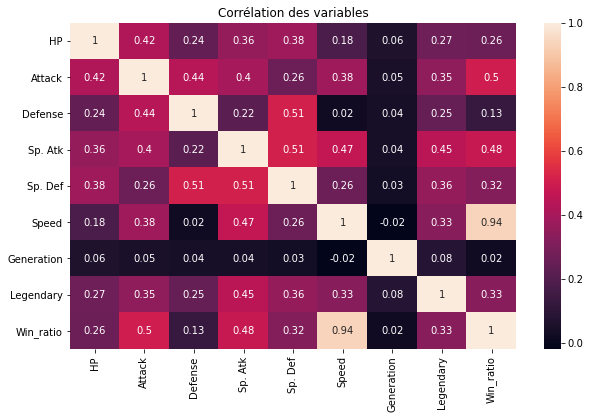

In [7]:
# Carte de corrélation 
plt.figure(figsize=(10, 6))
plt.title('Corrélation des variables')


matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

Les pokemons légendaire semblent avoir une Sp. Attack élévée  
- D'après la base de données les trois variables les plus corrélées au trait "légendaire" sont :   
    - __Sp. Atk__, 
    - __Sp. Def__,  
    - __Speed__ (ou __Win_Ratio__) 

<AxesSubplot:title={'center':'Sp Atk selon Type 1'}, xlabel='Type 1', ylabel='Sp. Atk'>

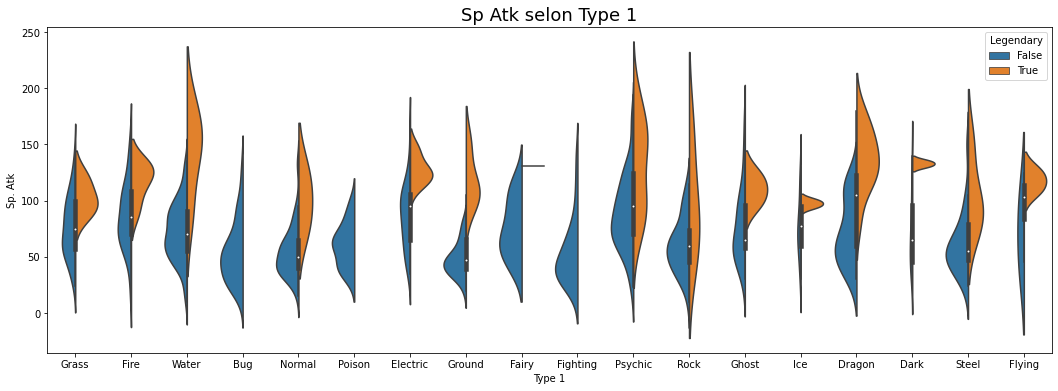

In [8]:
# Violin plot de ces trois variables selon le Type 1

plt.figure(figsize=(18, 6))
plt.title('Sp Atk selon Type 1', fontdict={'fontsize':18})
sns.violinplot(data=df, x="Type 1", y="Sp. Atk", hue="Legendary", split=True)

<AxesSubplot:title={'center':'Sp. Def selon Type 1'}, xlabel='Type 1', ylabel='Sp. Def'>

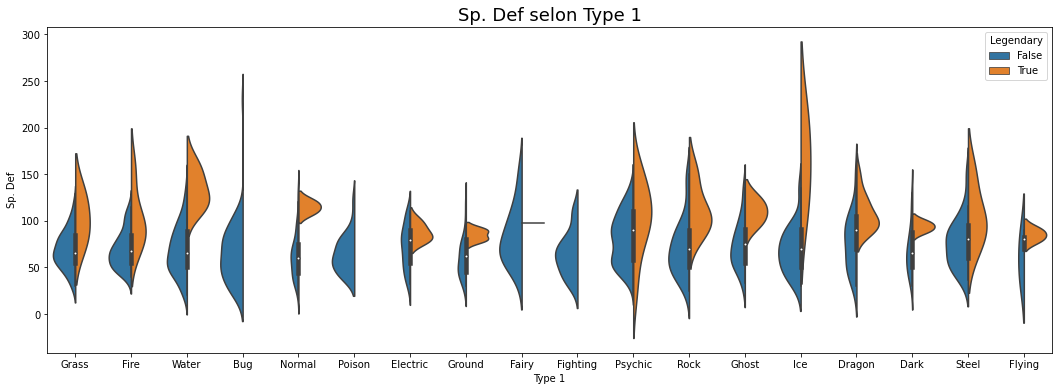

In [9]:
plt.figure(figsize=(18, 6))
plt.title('Sp. Def selon Type 1', fontdict={'fontsize':18})
sns.violinplot(data=df, x="Type 1", y="Sp. Def", hue="Legendary", split=True)

<AxesSubplot:title={'center':'Speed selon Type 1'}, xlabel='Type 1', ylabel='Speed'>

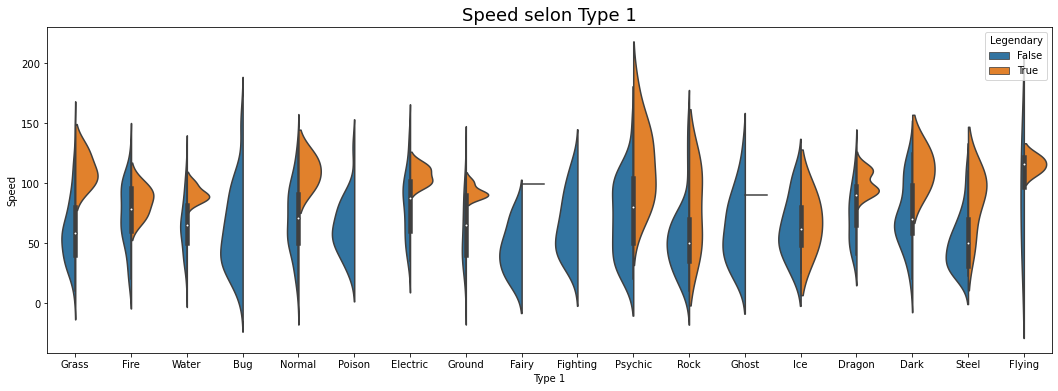

In [10]:
plt.figure(figsize=(18, 6))
plt.title('Speed selon Type 1', fontdict={'fontsize':18})
sns.violinplot(data=df, x="Type 1", y="Speed", hue="Legendary", split=True)

#### Les pokemons légendaires sont-ils ceux qui gagnent le plus ?

In [11]:
# Les 15 pokemons qui gagnent le plus 
df.iloc[df['Win_ratio'].sort_values(ascending=False).index[:15]]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win_ratio
#,,,,,,,,,,,,
156,Snorlax,Normal,NaN,160,110,65,65,110,30,1,False,0.357143
514,Magnezone,Electric,Steel,70,70,115,130,90,60,4,False,0.533898
705,Thundurus Incarnate Forme,Electric,Flying,79,115,70,125,80,111,5,True,0.864000
21,Pidgey,Normal,Flying,40,45,40,35,35,56,1,False,0.373016
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,0.984496
478,Mismagius,Ghost,NaN,60,60,60,105,105,105,4,False,0.848000
728,Bunnelby,Normal,NaN,38,36,38,32,36,57,6,False,0.389381
718,Genesect,Bug,Steel,71,120,95,120,95,99,5,False,0.820312
166,Mew,Psychic,NaN,100,100,100,100,100,100,1,False,0.831858


On observe effectivement quelques légendaires..

### Estimateurs

In [12]:
keept_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
clean_df = df[keept_columns].dropna()

train_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Pour la compatibilité avec les estimateurs
# À vous de trouver une meilleure approche si nécessaire
df_train = clean_df.sample(frac=0.7, random_state=1)

x_train, y_train = df_train[train_columns], df_train['Legendary']
x_test, y_test = clean_df[train_columns].drop(x_train.index), clean_df['Legendary'].drop(x_train.index)

In [13]:
len(clean_df), len(x_train), len(y_train), len(x_test), len(y_test)

(800, 560, 560, 240, 240)

#### À faire : vérifier l'équilibre des légendaire / pas légendaires dans les bases de données

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

#### À faire : ajouter d'autres métriques plus représentatives

In [15]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

print("Score sur la base d'entraînement", clf.score(x_train, y_train).round(3))
print("Score sur la base de test", clf.score(x_test, y_test).round(3))

Score sur la base d'entraînement 0.936
Score sur la base de test 0.946


In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

print("Score sur la base d'entraînement", clf.score(x_train, y_train).round(3))
print("Score sur la base de test", clf.score(x_test, y_test).round(3))
## Métriques à ajouter

Score sur la base d'entraînement 0.936
Score sur la base de test 0.95


In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

print("Score sur la base d'entraînement", clf.score(x_train, y_train).round(3))
print("Score sur la base de test", clf.score(x_test, y_test).round(3))

Score sur la base d'entraînement 0.998
Score sur la base de test 0.912


Les résultats sont très bons. Est-il possible de les maintenir tout en réduisant la dimension des variables ?

### Réduction de dimension

In [18]:
from sklearn.decomposition import PCA

In [19]:
keept_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
df = df[keept_columns].dropna()
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(df.values)
pca.explained_variance_ratio_

array([0.46095845, 0.18751895])

In [20]:
df_with_pca = df.copy()
res = pca.transform(df_with_pca)
print('Format de la nouvelle base de données :', res.shape)

df_with_pca['pca_dim_une'] = res[:, 0]
df_with_pca['pca_dim_deux'] = res[:, 1]

Format de la nouvelle base de données : (800, 2)


<AxesSubplot:xlabel='pca_dim_une', ylabel='pca_dim_deux'>

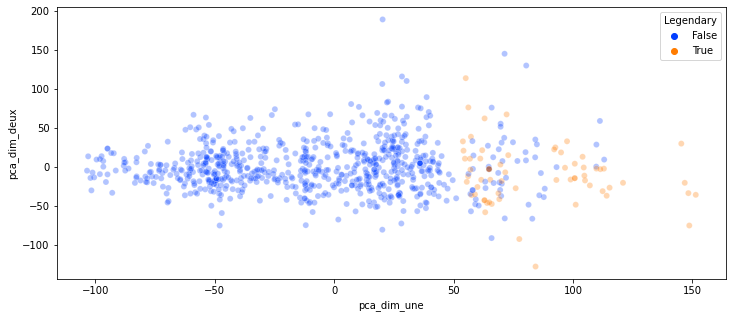

In [21]:
# Affichage des résultats

plt.figure(figsize=(12, 5))
sns.scatterplot(
    x='pca_dim_une', y='pca_dim_deux',
    hue='Legendary',
    data=df_with_pca,
    palette='bright',
    legend="full",
    alpha=0.3,
)

La première dimension semble être une piste intéressante à creuser.

In [22]:
# Bases d'entraînement et de test réduites 
df_train = df_with_pca.sample(frac=0.7, random_state=1)
x_train, y_train = df_train[['pca_dim_une', 'pca_dim_deux']], df_train['Legendary']

x_test = df_with_pca[['pca_dim_une', 'pca_dim_deux']].drop(df_train.index)
y_test = df_with_pca['Legendary'].drop(df_train.index)

In [23]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

print("Score sur la base d'entraînement", clf.score(x_train, y_train).round(3))
print("Score sur la base de test", clf.score(x_test, y_test).round(3))

Score sur la base d'entraînement 0.934
Score sur la base de test 0.942


Même si le nombre de variables a été grandement réduit (de 6 à 2) les résultats restent très similaires à ceux sur la base de données brute